In [1]:
!pip install pandasql
!pip install googledrivedownloader
import pandas as pd
import numpy as np
import datetime as dt
import re
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import glob
import seaborn as sns
import re
import os

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=7bd49d9b79d847f97f80aa3092563752e01b3bff59744402b7d7987445f7a807
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1. Import NBA Salaries dataset
2. Investigate for Null Values in the dataset
3. EDA on the dataset
  *   Histogram of salaries by year
  *   Distribution of salaries by year

In [2]:
NBA_salaries = pd.read_csv('https://raw.githubusercontent.com/prkapoor-seas/Bayesian-GLM-for-Salary-Prediction/main/NBA_Full_Salaries_2000-2019.csv')
NBA_salaries

,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5
...,...,...,...,...,...
37415,37416,George King,2019,77250.0,487
37416,37417,Drew Eubanks,2019,77250.0,487
37417,37418,Jordan Loyd,2019,77250.0,487
37418,37419,Wenyen Gabriel,2019,75000.0,512


In [3]:
## Check for null data by each column
NBA_salaries.isnull().sum()

,0
Unnamed: 0,0
Name,0
Year,0
Salaries,28074
Rank,0


In [4]:
## We find a large section of the salary data is missing - given magnitude best not to impute and just drop
NBA_salaries[NBA_salaries['Salaries'].isnull() == True]

,Unnamed: 0,Name,Year,Salaries,Rank
144,145,Hakeem Olajuwon,2000,NaN,145
145,146,David Robinson,2000,NaN,146
146,147,Dikembe Mutombo,2000,NaN,147
147,148,Patrick Ewing,2000,NaN,148
148,149,Jayson Williams,2000,NaN,149
...,...,...,...,...,...
37329,37330,Marcus Thornton II,2019,NaN,1867
37330,37331,Jameel Warney,2019,NaN,1868
37331,37332,Aaron Jackson,2019,NaN,1869
37332,37333,Trey McKinney-Jones,2019,NaN,1870


In [5]:
## thus to probably best explore data - we drop those rows
NBA_salaries.dropna(inplace = True)
NBA_salaries

,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5
...,...,...,...,...,...
37415,37416,George King,2019,77250.0,487
37416,37417,Drew Eubanks,2019,77250.0,487
37417,37418,Jordan Loyd,2019,77250.0,487
37418,37419,Wenyen Gabriel,2019,75000.0,512


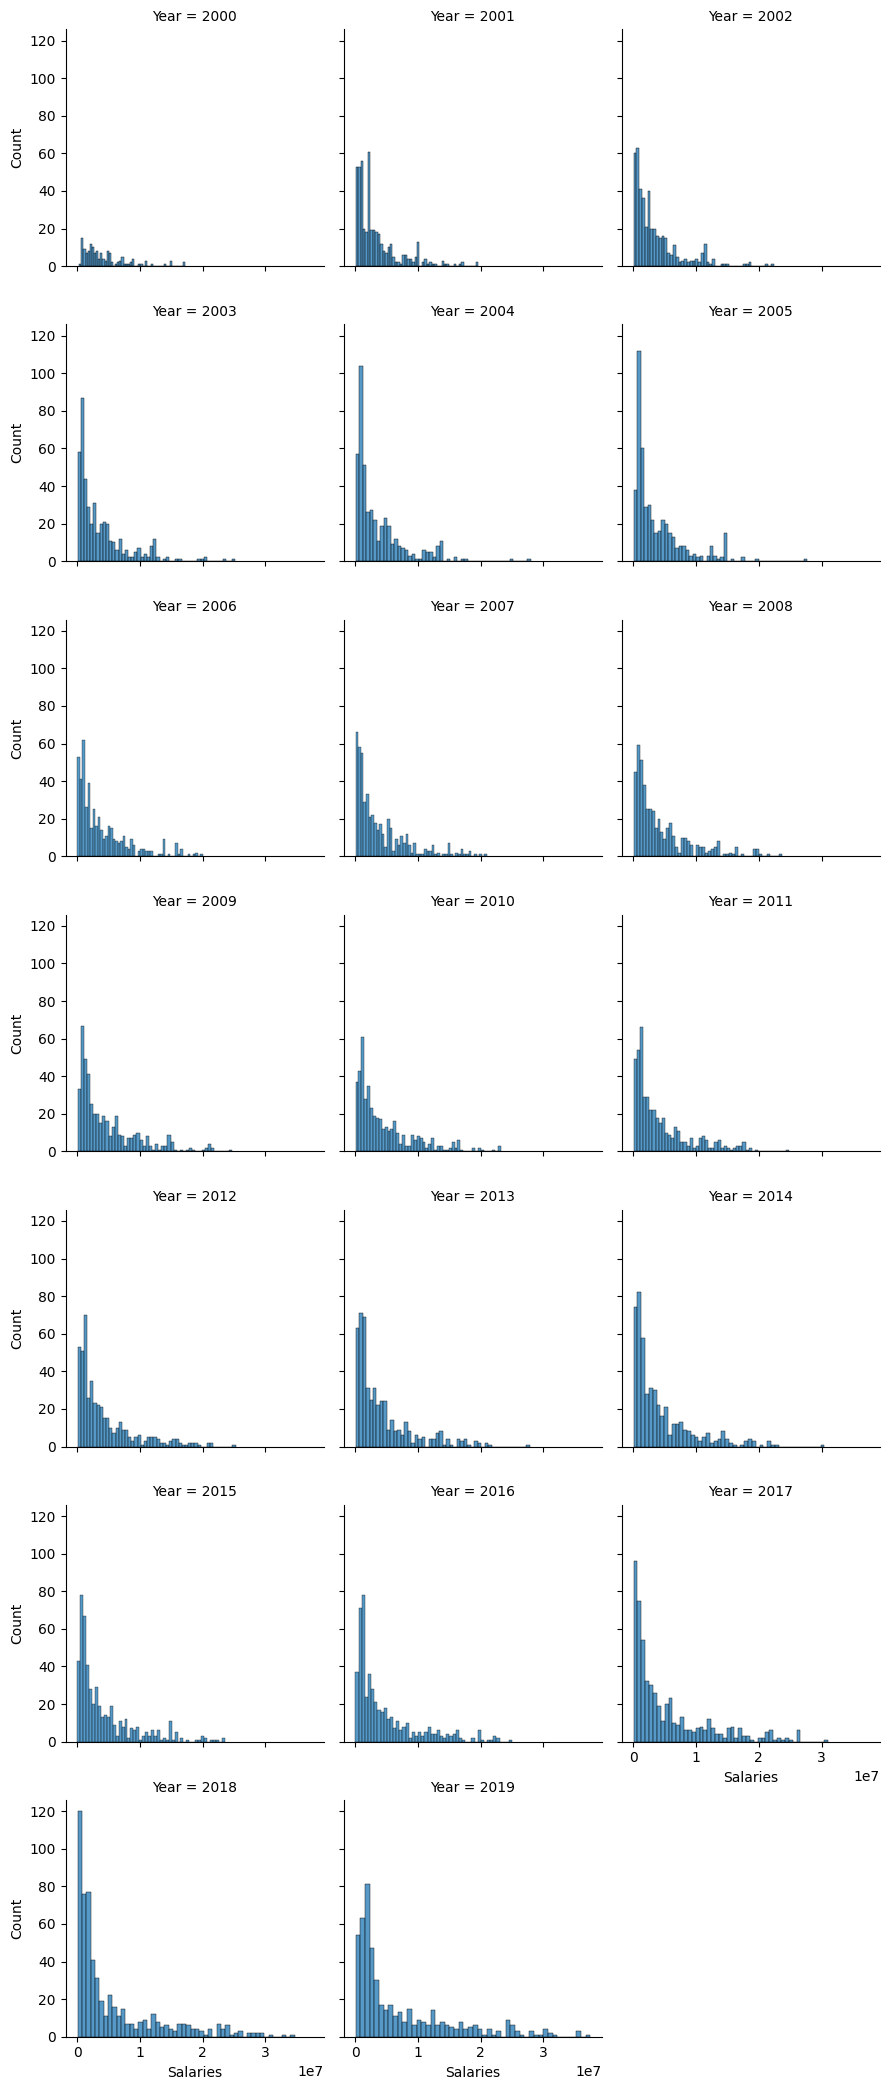

In [6]:
## Let's do exploratory analysis on the salary data
## 1. Plot the distribution of salaries by Year
salary_plot = sns.FacetGrid(NBA_salaries, col="Year",col_wrap=3, sharex=True)
salary_plot.map(sns.histplot, "Salaries", bins=50)

In [7]:
pd.options.display.float_format = '{:,.2f}'.format
summary = NBA_salaries.groupby("Year")["Salaries"].agg(["min", "max" ,"mean", "count"])
summary

,min,max,mean,count
Year,,,,
2000,"301,000.00","17,142,000.00","4,232,652.78",144
2001,"40,000.00","19,610,000.00","3,304,928.99",455
2002,"26,190.00","22,400,000.00","3,463,517.48",450
2003,"29,832.00","25,200,000.00","3,702,467.96",451
2004,"32,375.00","28,000,000.00","3,684,159.76",454
2005,"34,118.00","27,696,430.00","3,773,687.55",470
2006,"24,315.00","20,000,000.00","3,961,305.05",479
2007,"20,133.00","21,000,000.00","3,917,887.23",495
2008,"42,203.00","23,750,000.00","4,400,600.82",469


In [8]:
summary.to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrr}\n\\toprule\n & min & max & mean & count \\\\\nYear &  &  &  &  \\\\\n\\midrule\n2000 & 301000.00 & 17142000.00 & 4232652.78 & 144 \\\\\n2001 & 40000.00 & 19610000.00 & 3304928.99 & 455 \\\\\n2002 & 26190.00 & 22400000.00 & 3463517.48 & 450 \\\\\n2003 & 29832.00 & 25200000.00 & 3702467.96 & 451 \\\\\n2004 & 32375.00 & 28000000.00 & 3684159.76 & 454 \\\\\n2005 & 34118.00 & 27696430.00 & 3773687.55 & 470 \\\\\n2006 & 24315.00 & 20000000.00 & 3961305.05 & 479 \\\\\n2007 & 20133.00 & 21000000.00 & 3917887.23 & 495 \\\\\n2008 & 42203.00 & 23750000.00 & 4400600.82 & 469 \\\\\n2009 & 46812.00 & 24751934.00 & 4692347.60 & 460 \\\\\n2010 & 26917.00 & 23239562.00 & 4633963.24 & 456 \\\\\n2011 & 55718.00 & 24806250.00 & 4413547.23 & 459 \\\\\n2012 & 42009.00 & 25244493.00 & 4354507.71 & 463 \\\\\n2013 & 25073.00 & 27849000.00 & 4274055.67 & 494 \\\\\n2014 & 28834.00 & 30453000.00 & 4322503.51 & 490 \\\\\n2015 & 20000.00 & 23500000.00 & 4293242.99 & 513 \\\\\n2016 & 9266.00

1. Import NBA Player Stats dataset
2. Investigate for null values in the dataset
3. Create new variables that are standardized
3. EDA on the dataset
  * Investigate number of players by each year
  * Investigate distribution of new variables created
  * Investigate matches with NBA salaries dataset



In [9]:
NBA_player_stats = pd.read_csv('https://raw.githubusercontent.com/prkapoor-seas/Bayesian-GLM-for-Salary-Prediction/main/players_stats_by_season_full_details.csv')
NBA_player_stats

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,"3,163.00",956,1665,0,...,"Mar 6, 1972",7-1,216.00,325.00,147.00,United States,Robert G. Cole High School,1.00,1.00,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,"3,126.00",788,1696,95,...,"Jan 26, 1977",6-6,198.00,220.00,100.00,United States,Mainland High School,1.00,5.00,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,"2,947.00",752,1476,2,...,"Jul 24, 1963",6-9,206.00,265.00,120.00,United States,Summerfield High School,1.00,13.00,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,"2,853.00",729,1733,89,...,"Jun 7, 1975",6-0,183.00,165.00,75.00,United States,Bethel High School,1.00,1.00,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,"3,425.00",747,1666,177,...,"Jul 23, 1968",6-4,193.00,180.00,82.00,United States,Skyline High School,1.00,2.00,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53944,Ukrainian-Superleague,2019 - 2020,International,Kyrylo Meshheryakov,MYK,15,127.00,7,28,2,...,"Aug 17, 1995",6-6,198.00,182.00,83.00,Ukraine,NaN,NaN,NaN,NaN
53945,Ukrainian-Superleague,2019 - 2020,International,Yaroslav Kadygrob,ODE,10,81.70,5,16,4,...,"Oct 28, 1991",6-3,191.00,187.00,85.00,Ukraine,NaN,NaN,NaN,NaN
53946,Ukrainian-Superleague,2019 - 2020,International,Ernesto Tkachuk,ODE,16,124.70,1,15,0,...,"Sep 17, 1994",6-2,188.00,200.00,91.00,Ukraine,NaN,NaN,NaN,NaN
53947,Ukrainian-Superleague,2019 - 2020,International,Andrij Shapovalov,KHAR,12,59.20,0,8,0,...,"Nov 10, 1993",6-2,188.00,171.00,78.00,Ukraine,NaN,NaN,NaN,NaN


In [10]:
## Restrict data to NBA and Regular Season only
NBA_player_stats = NBA_player_stats[NBA_player_stats['League'] == 'NBA']
NBA_player_stats = NBA_player_stats[NBA_player_stats['Stage'] == 'Regular_Season']
NBA_player_stats

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,draft_round,draft_pick,draft_team
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,"3,163.00",956,1665,0,...,"Mar 6, 1972",7-1,216.00,325.00,147.00,United States,Robert G. Cole High School,1.00,1.00,Orlando Magic
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,"3,126.00",788,1696,95,...,"Jan 26, 1977",6-6,198.00,220.00,100.00,United States,Mainland High School,1.00,5.00,Golden State Warriors
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,"2,947.00",752,1476,2,...,"Jul 24, 1963",6-9,206.00,265.00,120.00,United States,Summerfield High School,1.00,13.00,Utah Jazz
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,"2,853.00",729,1733,89,...,"Jun 7, 1975",6-0,183.00,165.00,75.00,United States,Bethel High School,1.00,1.00,Philadelphia Sixers
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,"3,425.00",747,1666,177,...,"Jul 23, 1968",6-4,193.00,180.00,82.00,United States,Skyline High School,1.00,2.00,Seattle SuperSonics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51971,NBA,2019 - 2020,Regular_Season,Matt Dellavedova,CLE,57,820.70,62,175,21,...,"Sep 8, 1990",6-4,193.00,200.00,91.00,Australia,Australian Institute of Sport,NaN,NaN,NaN
51972,NBA,2019 - 2020,Regular_Season,Goga Bitadze,IND,54,471.30,70,150,8,...,"Jul 20, 1999",6-11,211.00,245.00,111.00,Georgia,NaN,1.00,18.00,Indiana Pacers
51973,NBA,2019 - 2020,Regular_Season,Nassir Little,POR,48,572.50,65,151,14,...,"Feb 11, 2000",6-6,198.00,220.00,100.00,United States,Orlando Christian Prep High School,1.00,25.00,Portland Trail Blazers
51974,NBA,2019 - 2020,Regular_Season,David Nwaba,BRK,20,268.50,37,71,12,...,"Jan 14, 1993",6-4,193.00,219.00,99.00,United States,University City High School,NaN,NaN,NaN


In [11]:
## Check for null data by each column
NBA_player_stats.isnull().sum()

,0
League,0
Season,0
Stage,0
Player,0
Team,0
GP,0
MIN,0
FGM,0
FGA,0
3PM,0


In [12]:
## Create standardized variables for player performance

# Creating Percentage Based Statistics
NBA_player_stats['FG_pct'] = NBA_player_stats['FGM']/NBA_player_stats['FGA']
NBA_player_stats['THREES_pct'] = NBA_player_stats['3PM']/NBA_player_stats['3PA']
NBA_player_stats['FT_pct'] = NBA_player_stats['FTM']/NBA_player_stats['FTA']

# Getting Approximate Age of each Player
NBA_player_stats['Year'] = NBA_player_stats['Season'].str.split('-').str[1].astype(int)
NBA_player_stats['Age'] = NBA_player_stats['Year'].astype(int) - NBA_player_stats['birth_year']

# Normalizing/Scaling Data based on total time (games) played
NBA_player_stats['MIN_per_gp'] = NBA_player_stats['MIN']/NBA_player_stats['GP']
NBA_player_stats['PF_per_min'] = NBA_player_stats['PF']/NBA_player_stats['MIN']
NBA_player_stats['TOV_per_min'] = NBA_player_stats['TOV']/NBA_player_stats['MIN']
NBA_player_stats['REB_per_min'] = NBA_player_stats['REB']/NBA_player_stats['MIN']
NBA_player_stats['AST_per_min'] = NBA_player_stats['AST']/NBA_player_stats['MIN']
NBA_player_stats['STL_per_min'] = NBA_player_stats['STL']/NBA_player_stats['MIN']
NBA_player_stats['BLK_per_min'] = NBA_player_stats['BLK']/NBA_player_stats['MIN']
NBA_player_stats['PTS_per_min'] = NBA_player_stats['PTS']/NBA_player_stats['MIN']

# Drop columns that are not required
drop_columns = [['Stage', 'League', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA',
                 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'PTS',
                 'birth_month', 'birth_date', 'height_cm', 'weight_kg', 'high_school',
                 'draft_round', 'draft_pick', 'draft_team', 'birth_year',
                 'nationality', 'height', 'weight']]
for i in drop_columns:
  NBA_player_stats.drop(columns = i, inplace = True)

In [13]:
# Number of players by year
players_by_year = NBA_player_stats.groupby('Season')['Player'].count()
players_by_year

,Player
Season,
1999 - 2000,207
2000 - 2001,191
2001 - 2002,191
2002 - 2003,217
2003 - 2004,198
2004 - 2005,215
2005 - 2006,202
2006 - 2007,201
2007 - 2008,217


In [14]:
# Calculate summary statistics for all numerical variables in NBA_player_stats
summary_stats = NBA_player_stats.describe(include=np.number)
summary_stats

,GP,MIN,FG_pct,THREES_pct,FT_pct,Year,Age,MIN_per_gp,PF_per_min,TOV_per_min,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min
count,"4,658.00","4,658.00","4,656.00","4,371.00","4,655.00","4,658.00","4,658.00","4,658.00","4,658.00","4,658.00","4,658.00","4,658.00","4,658.00","4,658.00","4,658.00"
mean,73.18,"1,950.11",0.46,0.30,0.75,"2,010.62",27.70,26.43,0.09,0.06,0.18,0.09,0.03,0.02,0.41
std,8.75,637.08,0.06,0.14,0.10,6.19,4.18,7.55,0.03,0.02,0.08,0.06,0.01,0.02,0.12
min,1.00,0.70,0.00,0.00,0.26,"2,000.00",20.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,69.00,"1,473.00",0.42,0.27,0.70,"2,005.00",25.00,20.57,0.07,0.04,0.11,0.05,0.02,0.01,0.33
50%,75.00,"1,955.10",0.45,0.34,0.77,"2,011.00",27.00,26.69,0.08,0.05,0.16,0.07,0.03,0.01,0.40
75%,80.00,"2,439.68",0.49,0.38,0.82,"2,016.00",30.00,32.58,0.10,0.07,0.24,0.12,0.04,0.03,0.48
max,85.00,"3,485.00",0.74,1.00,1.00,"2,020.00",43.00,43.70,0.25,0.26,0.49,0.34,0.26,0.13,0.98


In [15]:
summary_stats.to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrrrrrrrrrrrrr}\n\\toprule\n & GP & MIN & FG_pct & THREES_pct & FT_pct & Year & Age & MIN_per_gp & PF_per_min & TOV_per_min & REB_per_min & AST_per_min & STL_per_min & BLK_per_min & PTS_per_min \\\\\n\\midrule\ncount & 4658.00 & 4658.00 & 4656.00 & 4371.00 & 4655.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 & 4658.00 \\\\\nmean & 73.18 & 1950.11 & 0.46 & 0.30 & 0.75 & 2010.62 & 27.70 & 26.43 & 0.09 & 0.06 & 0.18 & 0.09 & 0.03 & 0.02 & 0.41 \\\\\nstd & 8.75 & 637.08 & 0.06 & 0.14 & 0.10 & 6.19 & 4.18 & 7.55 & 0.03 & 0.02 & 0.08 & 0.06 & 0.01 & 0.02 & 0.12 \\\\\nmin & 1.00 & 0.70 & 0.00 & 0.00 & 0.26 & 2000.00 & 20.00 & 0.70 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\\\\n25% & 69.00 & 1473.00 & 0.42 & 0.27 & 0.70 & 2005.00 & 25.00 & 20.57 & 0.07 & 0.04 & 0.11 & 0.05 & 0.02 & 0.01 & 0.33 \\\\\n50% & 75.00 & 1955.10 & 0.45 & 0.34 & 0.77 & 2011.00 & 27.00 & 26.69 & 0.08 & 0.05 & 0.16 & 0.07 & 0.03 & 0.01 & 0.40 \\\\

In [16]:
# Assuming 'NBA_player_stats' DataFrame is already created as in your provided code.
NBA_player_stats_sorted = NBA_player_stats.sort_values(by=['Year', 'Player'])
NBA_player_stats_sorted

,Season,Player,Team,GP,MIN,FG_pct,THREES_pct,FT_pct,Year,Age,MIN_per_gp,PF_per_min,TOV_per_min,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min
184,1999 - 2000,A.C. Green,LAL,82,"1,929.00",0.45,0.25,0.69,2000,37.00,23.52,0.07,0.03,0.25,0.04,0.03,0.01,0.21
122,1999 - 2000,Aaron McKie,PHI,82,"1,952.00",0.41,0.36,0.83,2000,28.00,23.80,0.10,0.06,0.13,0.12,0.06,0.01,0.33
133,1999 - 2000,Aaron Williams,WAS,81,"1,545.00",0.52,0.00,0.73,2000,29.00,19.07,0.15,0.05,0.26,0.04,0.03,0.06,0.40
181,1999 - 2000,Adonal Foyle,GSW,76,"1,652.00",0.51,NaN,0.38,2000,25.00,21.74,0.13,0.04,0.26,0.03,0.02,0.08,0.25
166,1999 - 2000,Adrian Griffin,BOS,72,"1,927.00",0.42,0.28,0.75,2000,26.00,26.76,0.12,0.05,0.19,0.09,0.06,0.01,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51948,2019 - 2020,Wesley Iwundu,ORL,52,953.20,0.42,0.34,0.80,2020,26.00,18.33,0.08,0.03,0.14,0.06,0.03,0.01,0.31
51880,2019 - 2020,Wesley Matthews,MIL,67,"1,634.80",0.40,0.36,0.76,2020,34.00,24.40,0.06,0.03,0.10,0.06,0.02,0.01,0.30
51777,2019 - 2020,Will Barton,DEN,58,"1,915.90",0.45,0.38,0.77,2020,29.00,33.03,0.06,0.05,0.19,0.11,0.03,0.02,0.46
51918,2019 - 2020,Willie Cauley-Stein,DAL,54,"1,097.50",0.58,0.00,0.61,2020,27.00,20.32,0.11,0.04,0.29,0.06,0.05,0.05,0.36


In [17]:
NBA_salaries.sort_values(by=['Year', 'Name'])

,Unnamed: 0,Name,Year,Salaries,Rank
139,140,Al Harrington,2000,"745,000.00",140
34,35,Alan Henderson,2000,"5,318,000.00",35
118,119,Aleksandar Radojevic,2000,"1,325,000.00",119
2,3,Alonzo Mourning,2000,"15,004,000.00",3
111,112,Andre Miller,2000,"1,682,000.00",112
...,...,...,...,...,...
37399,37400,Zach Lofton,2019,"77,250.00",487
36027,36028,Zach Randolph,2019,"11,692,308.00",117
36199,36200,Zaza Pachulia,2019,"2,393,887.00",306
37348,37349,Zhaire Smith,2019,"2,615,160.00",284


In [18]:
## Merge the two datasets
## i. Check if both the datasets are at the Year-Player level
player_counts = NBA_player_stats.groupby(['Year', 'Player']).size().reset_index(name='count')
print(player_counts['count'].value_counts())

player_salaries_counts = NBA_salaries.groupby(['Year', 'Name']).size().reset_index(name='count')
print(player_salaries_counts['count'].value_counts())

## ii. Given both datasets are at the Year-Player level, merge them
NBA_stats_salaries_merged = pd.merge(NBA_player_stats, NBA_salaries, left_on=['Year', 'Player'], right_on=['Year', 'Name'], how='inner')
NBA_stats_salaries_merged

count
1    4658
Name: count, dtype: int64
count
1    9346
Name: count, dtype: int64


,Season,Player,Team,GP,MIN,FG_pct,THREES_pct,FT_pct,Year,Age,...,TOV_per_min,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min,Unnamed: 0,Name,Salaries,Rank
0,1999 - 2000,Shaquille O'Neal,LAL,79,"3,163.00",0.57,0.00,0.52,2000,28.00,...,0.07,0.34,0.09,0.01,0.08,0.74,1,Shaquille O'Neal,"17,142,000.00",1
1,1999 - 2000,Vince Carter,TOR,82,"3,126.00",0.46,0.40,0.79,2000,23.00,...,0.06,0.15,0.10,0.04,0.03,0.67,94,Vince Carter,"2,267,000.00",94
2,1999 - 2000,Karl Malone,UTA,82,"2,947.00",0.51,0.25,0.80,2000,37.00,...,0.08,0.26,0.10,0.03,0.02,0.71,6,Karl Malone,"14,000,000.00",6
3,1999 - 2000,Gary Payton,SEA,82,"3,425.00",0.45,0.34,0.74,2000,32.00,...,0.07,0.15,0.21,0.04,0.01,0.58,8,Gary Payton,"11,020,000.00",8
4,1999 - 2000,Jerry Stackhouse,DET,82,"3,148.00",0.43,0.29,0.82,2000,26.00,...,0.10,0.10,0.12,0.03,0.01,0.62,49,Jerry Stackhouse,"4,781,000.00",49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,2018 - 2019,Sindarius Thornwell,LAC,64,313.10,0.35,0.20,0.74,2019,25.00,...,0.06,0.14,0.06,0.04,0.02,0.20,37263,Sindarius Thornwell,"1,378,242.00",416
4036,2018 - 2019,Luc Mbah a Moute,LAC,4,61.00,0.44,0.33,0.40,2019,33.00,...,0.03,0.11,0.03,0.02,0.02,0.33,36559,Luc Mbah a Moute,"4,320,500.00",228
4037,2018 - 2019,Tyler Ulis,CHI,1,0.80,NaN,NaN,NaN,2019,23.00,...,0.00,0.00,0.00,0.00,0.00,0.00,37139,Tyler Ulis,"77,250.00",487
4038,2018 - 2019,John Holland,CLE,1,0.70,NaN,NaN,NaN,2019,31.00,...,0.00,0.00,0.00,0.00,0.00,0.00,37098,John Holland,"77,250.00",487


In [19]:
NBA_stats_salaries_merged.isnull().sum()

,0
Season,0
Player,0
Team,0
GP,0
MIN,0
FG_pct,2
THREES_pct,263
FT_pct,3
Year,0
Age,0


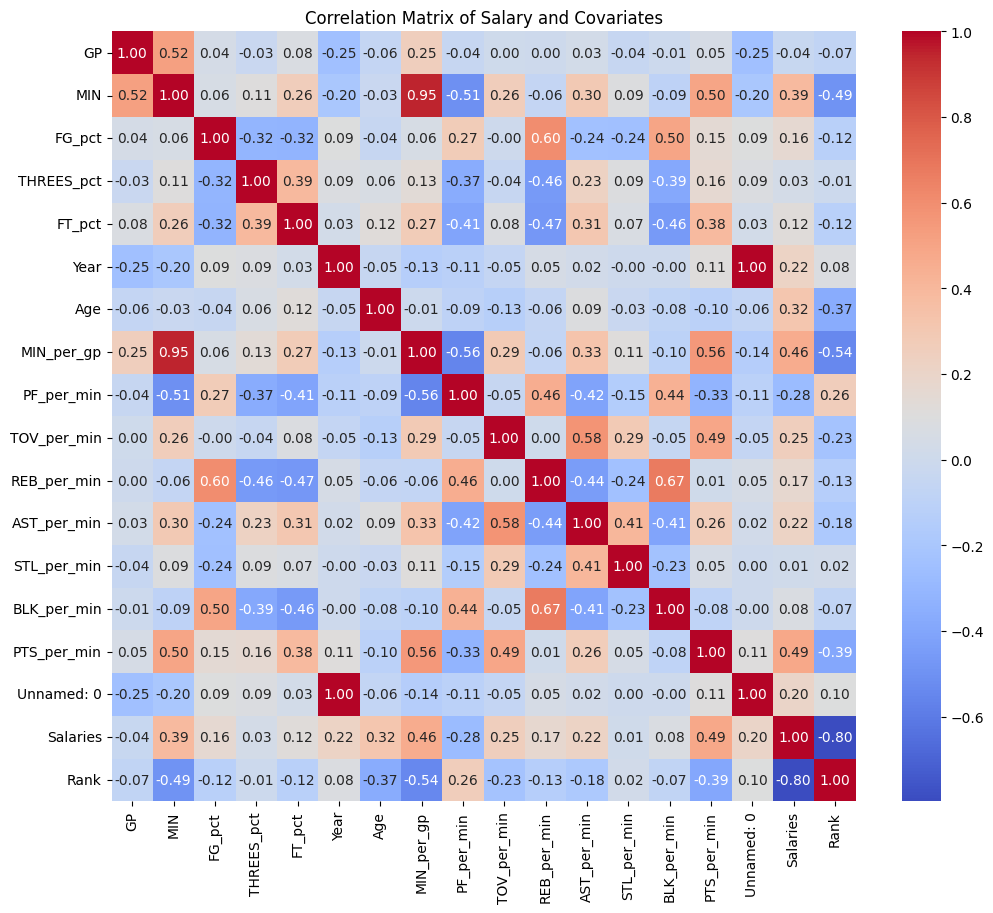

In [20]:
## Explore general correlations between Salaries and other covariates
correlation_matrix = NBA_stats_salaries_merged.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Salary and Covariates')
plt.show()

In [21]:
## Fill the null values with 0 for the percent variables
NBA_stats_salaries_merged['FG_pct'] = NBA_stats_salaries_merged['FG_pct'].fillna(0)
NBA_stats_salaries_merged['THREES_pct'] = NBA_stats_salaries_merged['THREES_pct'].fillna(0)
NBA_stats_salaries_merged['FT_pct'] = NBA_stats_salaries_merged['FT_pct'].fillna(0)
NBA_stats_salaries_merged

,Season,Player,Team,GP,MIN,FG_pct,THREES_pct,FT_pct,Year,Age,...,TOV_per_min,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min,Unnamed: 0,Name,Salaries,Rank
0,1999 - 2000,Shaquille O'Neal,LAL,79,"3,163.00",0.57,0.00,0.52,2000,28.00,...,0.07,0.34,0.09,0.01,0.08,0.74,1,Shaquille O'Neal,"17,142,000.00",1
1,1999 - 2000,Vince Carter,TOR,82,"3,126.00",0.46,0.40,0.79,2000,23.00,...,0.06,0.15,0.10,0.04,0.03,0.67,94,Vince Carter,"2,267,000.00",94
2,1999 - 2000,Karl Malone,UTA,82,"2,947.00",0.51,0.25,0.80,2000,37.00,...,0.08,0.26,0.10,0.03,0.02,0.71,6,Karl Malone,"14,000,000.00",6
3,1999 - 2000,Gary Payton,SEA,82,"3,425.00",0.45,0.34,0.74,2000,32.00,...,0.07,0.15,0.21,0.04,0.01,0.58,8,Gary Payton,"11,020,000.00",8
4,1999 - 2000,Jerry Stackhouse,DET,82,"3,148.00",0.43,0.29,0.82,2000,26.00,...,0.10,0.10,0.12,0.03,0.01,0.62,49,Jerry Stackhouse,"4,781,000.00",49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,2018 - 2019,Sindarius Thornwell,LAC,64,313.10,0.35,0.20,0.74,2019,25.00,...,0.06,0.14,0.06,0.04,0.02,0.20,37263,Sindarius Thornwell,"1,378,242.00",416
4036,2018 - 2019,Luc Mbah a Moute,LAC,4,61.00,0.44,0.33,0.40,2019,33.00,...,0.03,0.11,0.03,0.02,0.02,0.33,36559,Luc Mbah a Moute,"4,320,500.00",228
4037,2018 - 2019,Tyler Ulis,CHI,1,0.80,0.00,0.00,0.00,2019,23.00,...,0.00,0.00,0.00,0.00,0.00,0.00,37139,Tyler Ulis,"77,250.00",487
4038,2018 - 2019,John Holland,CLE,1,0.70,0.00,0.00,0.00,2019,31.00,...,0.00,0.00,0.00,0.00,0.00,0.00,37098,John Holland,"77,250.00",487


In [22]:
## Drop unnamed:0, rank, name variables
NBA_stats_salaries_merged.drop(columns = ['Unnamed: 0', 'Rank', 'Name', 'MIN'], inplace = True)
NBA_stats_salaries_merged = NBA_stats_salaries_merged[NBA_stats_salaries_merged['Year'] != 2000]
NBA_stats_salaries_merged = NBA_stats_salaries_merged[NBA_stats_salaries_merged['Team'] != 'VAN']
NBA_stats_salaries_merged

,Season,Player,Team,GP,FG_pct,THREES_pct,FT_pct,Year,Age,MIN_per_gp,PF_per_min,TOV_per_min,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min,Salaries
98,2000 - 2001,Jerry Stackhouse,DET,80,0.40,0.35,0.82,2001,27.00,40.19,0.05,0.10,0.10,0.13,0.03,0.02,0.74,"5,310,000.00"
99,2000 - 2001,Allen Iverson,PHI,71,0.42,0.32,0.81,2001,26.00,41.96,0.05,0.08,0.09,0.11,0.06,0.01,0.74,"10,130,000.00"
100,2000 - 2001,Shaquille O'Neal,LAL,74,0.57,0.00,0.51,2001,29.00,39.51,0.09,0.07,0.32,0.09,0.02,0.07,0.73,"19,285,715.00"
101,2000 - 2001,Paul Pierce,BOS,82,0.45,0.38,0.75,2001,24.00,38.05,0.08,0.08,0.17,0.08,0.04,0.02,0.66,"1,608,840.00"
102,2000 - 2001,Vince Carter,TOR,75,0.46,0.41,0.76,2001,24.00,39.72,0.07,0.06,0.14,0.10,0.04,0.03,0.69,"2,425,440.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,2018 - 2019,Sindarius Thornwell,LAC,64,0.35,0.20,0.74,2019,25.00,4.89,0.13,0.06,0.14,0.06,0.04,0.02,0.20,"1,378,242.00"
4036,2018 - 2019,Luc Mbah a Moute,LAC,4,0.44,0.33,0.40,2019,33.00,15.25,0.13,0.03,0.11,0.03,0.02,0.02,0.33,"4,320,500.00"
4037,2018 - 2019,Tyler Ulis,CHI,1,0.00,0.00,0.00,2019,23.00,0.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"77,250.00"
4038,2018 - 2019,John Holland,CLE,1,0.00,0.00,0.00,2019,31.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"77,250.00"


In [23]:
## Standardize the Age, GP and MIN variables
NBA_stats_salaries_merged['Age_std'] = (NBA_stats_salaries_merged['Age'] - NBA_stats_salaries_merged['Age'].mean())/NBA_stats_salaries_merged['Age'].std()
NBA_stats_salaries_merged['GP_std'] = (NBA_stats_salaries_merged['GP'] - NBA_stats_salaries_merged['GP'].mean())/NBA_stats_salaries_merged['GP'].std()
NBA_stats_salaries_merged['MIN_per_gp_std'] = (NBA_stats_salaries_merged['MIN_per_gp'] - NBA_stats_salaries_merged['MIN_per_gp'].mean())/NBA_stats_salaries_merged['MIN_per_gp'].std()
NBA_stats_salaries_merged

,Season,Player,Team,GP,FG_pct,THREES_pct,FT_pct,Year,Age,MIN_per_gp,...,TOV_per_min,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min,Salaries,Age_std,GP_std,MIN_per_gp_std
98,2000 - 2001,Jerry Stackhouse,DET,80,0.40,0.35,0.82,2001,27.00,40.19,...,0.10,0.10,0.13,0.03,0.02,0.74,"5,310,000.00",-0.17,0.76,1.79
99,2000 - 2001,Allen Iverson,PHI,71,0.42,0.32,0.81,2001,26.00,41.96,...,0.08,0.09,0.11,0.06,0.01,0.74,"10,130,000.00",-0.41,-0.35,2.02
100,2000 - 2001,Shaquille O'Neal,LAL,74,0.57,0.00,0.51,2001,29.00,39.51,...,0.07,0.32,0.09,0.02,0.07,0.73,"19,285,715.00",0.31,0.02,1.70
101,2000 - 2001,Paul Pierce,BOS,82,0.45,0.38,0.75,2001,24.00,38.05,...,0.08,0.17,0.08,0.04,0.02,0.66,"1,608,840.00",-0.89,1.00,1.51
102,2000 - 2001,Vince Carter,TOR,75,0.46,0.41,0.76,2001,24.00,39.72,...,0.06,0.14,0.10,0.04,0.03,0.69,"2,425,440.00",-0.89,0.14,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,2018 - 2019,Sindarius Thornwell,LAC,64,0.35,0.20,0.74,2019,25.00,4.89,...,0.06,0.14,0.06,0.04,0.02,0.20,"1,378,242.00",-0.65,-1.21,-2.84
4036,2018 - 2019,Luc Mbah a Moute,LAC,4,0.44,0.33,0.40,2019,33.00,15.25,...,0.03,0.11,0.03,0.02,0.02,0.33,"4,320,500.00",1.27,-8.60,-1.48
4037,2018 - 2019,Tyler Ulis,CHI,1,0.00,0.00,0.00,2019,23.00,0.80,...,0.00,0.00,0.00,0.00,0.00,0.00,"77,250.00",-1.13,-8.97,-3.38
4038,2018 - 2019,John Holland,CLE,1,0.00,0.00,0.00,2019,31.00,0.70,...,0.00,0.00,0.00,0.00,0.00,0.00,"77,250.00",0.79,-8.97,-3.39


In [24]:
## Logarithmize the salary and run an OLS regression on salary with team and year fixed effects to find informative priors for coefficients
NBA_stats_salaries_merged['log_salary'] = np.log10(NBA_stats_salaries_merged['Salaries'])
NBA_stats_salaries_merged

,Season,Player,Team,GP,FG_pct,THREES_pct,FT_pct,Year,Age,MIN_per_gp,...,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min,Salaries,Age_std,GP_std,MIN_per_gp_std,log_salary
98,2000 - 2001,Jerry Stackhouse,DET,80,0.40,0.35,0.82,2001,27.00,40.19,...,0.10,0.13,0.03,0.02,0.74,"5,310,000.00",-0.17,0.76,1.79,6.73
99,2000 - 2001,Allen Iverson,PHI,71,0.42,0.32,0.81,2001,26.00,41.96,...,0.09,0.11,0.06,0.01,0.74,"10,130,000.00",-0.41,-0.35,2.02,7.01
100,2000 - 2001,Shaquille O'Neal,LAL,74,0.57,0.00,0.51,2001,29.00,39.51,...,0.32,0.09,0.02,0.07,0.73,"19,285,715.00",0.31,0.02,1.70,7.29
101,2000 - 2001,Paul Pierce,BOS,82,0.45,0.38,0.75,2001,24.00,38.05,...,0.17,0.08,0.04,0.02,0.66,"1,608,840.00",-0.89,1.00,1.51,6.21
102,2000 - 2001,Vince Carter,TOR,75,0.46,0.41,0.76,2001,24.00,39.72,...,0.14,0.10,0.04,0.03,0.69,"2,425,440.00",-0.89,0.14,1.73,6.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,2018 - 2019,Sindarius Thornwell,LAC,64,0.35,0.20,0.74,2019,25.00,4.89,...,0.14,0.06,0.04,0.02,0.20,"1,378,242.00",-0.65,-1.21,-2.84,6.14
4036,2018 - 2019,Luc Mbah a Moute,LAC,4,0.44,0.33,0.40,2019,33.00,15.25,...,0.11,0.03,0.02,0.02,0.33,"4,320,500.00",1.27,-8.60,-1.48,6.64
4037,2018 - 2019,Tyler Ulis,CHI,1,0.00,0.00,0.00,2019,23.00,0.80,...,0.00,0.00,0.00,0.00,0.00,"77,250.00",-1.13,-8.97,-3.38,4.89
4038,2018 - 2019,John Holland,CLE,1,0.00,0.00,0.00,2019,31.00,0.70,...,0.00,0.00,0.00,0.00,0.00,"77,250.00",0.79,-8.97,-3.39,4.89


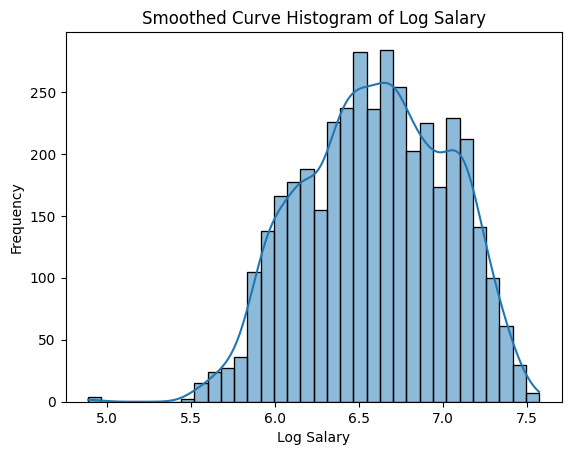

In [25]:
# Plot the log salary data smoothed curved histogram

sns.histplot(NBA_stats_salaries_merged['log_salary'], kde=True)
plt.title('Smoothed Curve Histogram of Log Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Calculate observations per year and team
observations_per_team = NBA_stats_salaries_merged.groupby(['Team']).size().reset_index(name='Observations')

observations_per_team

,Team,Observations
0,ATL,129
1,BOS,157
2,BRK,58
3,CHA,103
4,CHI,134
5,CLE,130
6,DAL,141
7,DEN,123
8,DET,140
9,GSW,134


In [27]:
# Calculate observations per year and team
observations_per_year_team = NBA_stats_salaries_merged.groupby(['Year', 'Team']).size().reset_index(name='Observations')

# Pivot to wide format
wide_format = observations_per_year_team.pivot(index="Team", columns="Year", values="Observations").fillna(0)

# Reset index for a cleaner look
wide_format = wide_format.reset_index()
wide_format

Year,Team,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ATL,5.00,6.00,8.00,5.00,4.00,7.00,4.00,6.00,7.00,9.00,8.00,10.00,6.00,7.00,8.00,8.00,9.00,5.00,7.00
1,BOS,5.00,10.00,7.00,7.00,9.00,6.00,5.00,11.00,8.00,9.00,7.00,10.00,7.00,6.00,8.00,8.00,12.00,13.00,9.00
2,BRK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,9.00,8.00,6.00,8.00,9.00,9.00
3,CHA,6.00,6.00,0.00,0.00,7.00,4.00,5.00,6.00,6.00,5.00,3.00,3.00,7.00,6.00,3.00,8.00,8.00,9.00,11.00
4,CHI,4.00,7.00,7.00,4.00,9.00,8.00,7.00,5.00,6.00,7.00,8.00,7.00,9.00,8.00,9.00,3.00,10.00,7.00,9.00
5,CLE,5.00,6.00,6.00,7.00,9.00,6.00,9.00,8.00,8.00,7.00,3.00,4.00,5.00,6.00,8.00,6.00,10.00,10.00,7.00
6,DAL,6.00,6.00,9.00,6.00,10.00,10.00,8.00,7.00,7.00,6.00,8.00,7.00,6.00,8.00,7.00,6.00,8.00,9.00,7.00
7,DEN,8.00,4.00,6.00,8.00,9.00,6.00,6.00,7.00,7.00,5.00,5.00,6.00,8.00,5.00,3.00,5.00,8.00,9.00,8.00
8,DET,5.00,8.00,8.00,10.00,8.00,8.00,8.00,10.00,6.00,4.00,7.00,7.00,7.00,7.00,5.00,8.00,7.00,9.00,8.00
9,GSW,1.00,8.00,7.00,5.00,5.00,5.00,7.00,7.00,2.00,3.00,7.00,6.00,9.00,8.00,9.00,8.00,12.00,13.00,12.00


In [28]:
import statsmodels.formula.api as sm

model = sm.ols(formula="log_salary ~  Age_std + GP_std + MIN_per_gp_std + FG_pct + THREES_pct + FT_pct + PF_per_min + TOV_per_min + REB_per_min + AST_per_min + STL_per_min + BLK_per_min + PTS_per_min + C(Year) + C(Team) ", data=NBA_stats_salaries_merged)
results = model.fit()
# Print the summary of the regression results, excluding fixed effects
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     80.08
Date:                Sat, 21 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:11:56   Log-Likelihood:                -609.32
No. Observations:                3936   AIC:                             1345.
Df Residuals:                    3873   BIC:                             1740.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.2277      0.080     

In [29]:
summary.to_latex(index=True, float_format="%.2f")
summary_stats.to_latex(index=True, float_format="%.2f")
print(results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &   log\_salary    & \textbf{  R-squared:         } &     0.562   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.555   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     80.08   \\
\textbf{Date:}             & Sat, 21 Dec 2024 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}             &     07:11:56     & \textbf{  Log-Likelihood:    } &   -609.32   \\
\textbf{No. Observations:} &        3936      & \textbf{  AIC:               } &     1345.   \\
\textbf{Df Residuals:}     &        3873      & \textbf{  BIC:               } &     1740.   \\
\textbf{Df Model:}         &          62      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                           & \textbf{co

Running Bayesian GLMs
1. Run Normal GLM with fixed effects for team and year
2. Run Normal GLM with random effects for team and year



In [30]:
import pandas as pd
import numpy as np
import arviz as az
import numpy as np
import pymc as pm
from pymc.math import dot, stack, concatenate, exp, invlogit
import pytensor.tensor as pt
from sklearn.preprocessing import StandardScaler
import xarray as xr
import seaborn as sns
from scipy.stats import norm

Model 1: Fixed Effects Normal GLM

y ~ N(α + β * X + team_fixed_effects + year_fixed_effects , 5)

α ~ N(5, 5)

β ~ N(0, 3)

fixed_effects ~ N(0, 3)

player_random_effects ~ N(0,2)


In [31]:
# only keep dummy variable rows

dummy_cols = ['Year', 'Team']

NBA_stats_salaries_merged_dummy = NBA_stats_salaries_merged.dropna(subset=dummy_cols)

NBA_stats_salaries_merged_dummy

,Season,Player,Team,GP,FG_pct,THREES_pct,FT_pct,Year,Age,MIN_per_gp,...,REB_per_min,AST_per_min,STL_per_min,BLK_per_min,PTS_per_min,Salaries,Age_std,GP_std,MIN_per_gp_std,log_salary
98,2000 - 2001,Jerry Stackhouse,DET,80,0.40,0.35,0.82,2001,27.00,40.19,...,0.10,0.13,0.03,0.02,0.74,"5,310,000.00",-0.17,0.76,1.79,6.73
99,2000 - 2001,Allen Iverson,PHI,71,0.42,0.32,0.81,2001,26.00,41.96,...,0.09,0.11,0.06,0.01,0.74,"10,130,000.00",-0.41,-0.35,2.02,7.01
100,2000 - 2001,Shaquille O'Neal,LAL,74,0.57,0.00,0.51,2001,29.00,39.51,...,0.32,0.09,0.02,0.07,0.73,"19,285,715.00",0.31,0.02,1.70,7.29
101,2000 - 2001,Paul Pierce,BOS,82,0.45,0.38,0.75,2001,24.00,38.05,...,0.17,0.08,0.04,0.02,0.66,"1,608,840.00",-0.89,1.00,1.51,6.21
102,2000 - 2001,Vince Carter,TOR,75,0.46,0.41,0.76,2001,24.00,39.72,...,0.14,0.10,0.04,0.03,0.69,"2,425,440.00",-0.89,0.14,1.73,6.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,2018 - 2019,Sindarius Thornwell,LAC,64,0.35,0.20,0.74,2019,25.00,4.89,...,0.14,0.06,0.04,0.02,0.20,"1,378,242.00",-0.65,-1.21,-2.84,6.14
4036,2018 - 2019,Luc Mbah a Moute,LAC,4,0.44,0.33,0.40,2019,33.00,15.25,...,0.11,0.03,0.02,0.02,0.33,"4,320,500.00",1.27,-8.60,-1.48,6.64
4037,2018 - 2019,Tyler Ulis,CHI,1,0.00,0.00,0.00,2019,23.00,0.80,...,0.00,0.00,0.00,0.00,0.00,"77,250.00",-1.13,-8.97,-3.38,4.89
4038,2018 - 2019,John Holland,CLE,1,0.00,0.00,0.00,2019,31.00,0.70,...,0.00,0.00,0.00,0.00,0.00,"77,250.00",0.79,-8.97,-3.39,4.89


In [32]:
##Extract the variables and dataset
X = NBA_stats_salaries_merged[['Age_std', 'GP_std', 'MIN_per_gp_std', 'FG_pct', 'THREES_pct', 'FT_pct', 'PF_per_min', 'TOV_per_min', 'REB_per_min', 'AST_per_min', 'STL_per_min', 'BLK_per_min', 'PTS_per_min', 'Team', 'Player', 'Year']]
y = NBA_stats_salaries_merged['log_salary']

X2 = NBA_stats_salaries_merged[['Team', 'Year']]
X2 = pd.get_dummies(X2, columns=['Team', 'Year'], drop_first=True)
X2 = X2.astype(float)
X2 = X2.values
y = y.values

# no_players = NBA_stats_salaries_merged['Player'].nunique()
# NBA_stats_salaries_merged['Player_code'] = NBA_stats_salaries_merged['Player'].astype('category').cat.codes


In [33]:
# Bayesian GLM with fixed effects with weakly informative priors
with pm.Model() as model:

    # Priors for global intercept and coefficients
    intercept = pm.Normal("Intercept", mu=5, sigma=5)
    beta_age = pm.Normal("beta_age", mu=0, sigma=3)
    beta_gp = pm.Normal("beta_gp", mu=0, sigma=3)
    beta_min = pm.Normal("beta_min", mu=0, sigma=3)
    beta_fg = pm.Normal("beta_fg", mu=0, sigma=3)
    beta_threes = pm.Normal("beta_threes", mu=0, sigma=3)
    beta_ft = pm.Normal("beta_ft", mu=0, sigma=3)
    beta_pf = pm.Normal("beta_pf", mu=0, sigma=3)
    beta_tov = pm.Normal("beta_tov", mu=0, sigma=3)
    beta_reb = pm.Normal("beta_reb", mu=0, sigma=3)
    beta_ast = pm.Normal("beta_ast", mu=0, sigma=3)
    beta_stl = pm.Normal("beta_stl", mu=0, sigma=3)
    beta_blk = pm.Normal("beta_blk", mu=0, sigma=3)
    beta_pts = pm.Normal("beta_pts", mu=0, sigma=3)
    beta = pm.Normal("fixed_effects", mu=0, sigma=2, shape=X2.shape[1])

    # Expected value of the target
    mu = (
        intercept
        + beta_age * X['Age_std']
        + beta_gp * X['GP_std']
        + beta_min * X['MIN_per_gp_std']
        + beta_fg * X['FG_pct']
        + beta_threes * X['THREES_pct']
        + beta_ft * X['FT_pct']
        + beta_pf * X['PF_per_min']
        + beta_tov * X['TOV_per_min']
        + beta_reb * X['REB_per_min']
        + beta_ast * X['AST_per_min']
        + beta_stl * X['STL_per_min']
        + beta_blk * X['BLK_per_min']
        + beta_pts * X['PTS_per_min']
        + pm.math.dot(X2, beta)
    )

    # Likelihood
    sigma = pm.Exponential("sigma", 1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Sampling
    trace = pm.sample(1000, tune = 1000, return_inferencedata=True)

Output()

Output()

In [34]:
## Summarize the regression results
summary = az.summary(trace, hdi_prob=0.95, var_names=['Intercept', 'beta_age', 'beta_gp', 'beta_min', 'beta_fg', 'beta_threes', 'beta_ft', 'beta_pf', 'beta_tov', 'beta_reb', 'beta_ast', 'beta_stl', 'beta_blk', 'beta_pts'])
summary

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.22,0.08,6.07,6.38,0.00,0.00,381.00,"1,148.00",1.00
beta_age,0.18,0.01,0.17,0.19,0.00,0.00,"2,054.00","1,449.00",1.00
beta_gp,-0.01,0.01,-0.02,-0.00,0.00,0.00,"1,709.00","1,510.00",1.00
beta_min,0.20,0.01,0.18,0.21,0.00,0.00,"1,651.00","1,495.00",1.00
beta_fg,-0.37,0.11,-0.58,-0.15,0.00,0.00,"1,398.00","1,455.00",1.00
beta_threes,-0.08,0.04,-0.16,-0.01,0.00,0.00,"1,980.00","1,500.00",1.00
beta_ft,-0.12,0.06,-0.24,-0.01,0.00,0.00,"1,155.00","1,639.00",1.00
beta_pf,-0.04,0.25,-0.52,0.46,0.01,0.01,"1,658.00","1,656.00",1.00
beta_tov,0.65,0.40,-0.12,1.45,0.01,0.01,996.00,"1,073.00",1.00
beta_reb,0.80,0.10,0.60,0.98,0.00,0.00,"1,402.00","1,436.00",1.00


In [35]:
az.summary(trace, hdi_prob=0.95, var_names=['Intercept', 'beta_age', 'beta_gp', 'beta_min', 'beta_fg', 'beta_threes', 'beta_ft', 'beta_pf', 'beta_tov', 'beta_reb', 'beta_ast', 'beta_stl', 'beta_blk', 'beta_pts']).to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n & mean & sd & hdi_2.5% & hdi_97.5% & mcse_mean & mcse_sd & ess_bulk & ess_tail & r_hat \\\\\n\\midrule\nIntercept & 6.22 & 0.08 & 6.07 & 6.38 & 0.00 & 0.00 & 381.00 & 1148.00 & 1.00 \\\\\nbeta_age & 0.18 & 0.01 & 0.17 & 0.19 & 0.00 & 0.00 & 2054.00 & 1449.00 & 1.00 \\\\\nbeta_gp & -0.01 & 0.01 & -0.02 & -0.00 & 0.00 & 0.00 & 1709.00 & 1510.00 & 1.00 \\\\\nbeta_min & 0.20 & 0.01 & 0.18 & 0.21 & 0.00 & 0.00 & 1651.00 & 1495.00 & 1.00 \\\\\nbeta_fg & -0.37 & 0.11 & -0.58 & -0.15 & 0.00 & 0.00 & 1398.00 & 1455.00 & 1.00 \\\\\nbeta_threes & -0.08 & 0.04 & -0.16 & -0.01 & 0.00 & 0.00 & 1980.00 & 1500.00 & 1.00 \\\\\nbeta_ft & -0.12 & 0.06 & -0.24 & -0.01 & 0.00 & 0.00 & 1155.00 & 1639.00 & 1.00 \\\\\nbeta_pf & -0.04 & 0.25 & -0.52 & 0.46 & 0.01 & 0.01 & 1658.00 & 1656.00 & 1.00 \\\\\nbeta_tov & 0.65 & 0.40 & -0.12 & 1.45 & 0.01 & 0.01 & 996.00 & 1073.00 & 1.00 \\\\\nbeta_reb & 0.80 & 0.10 & 0.60 & 0.98 & 0.00 & 0.00 & 1402.00 & 1436.00 & 1.00 \\\\\n

Output()

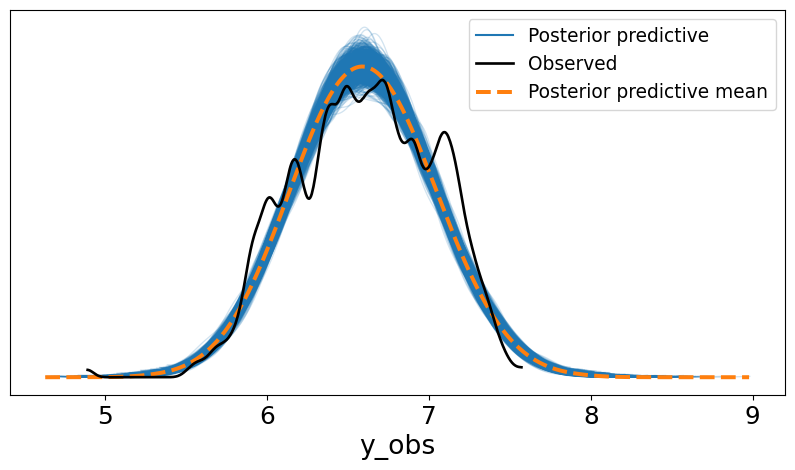

In [36]:
with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_obs"])

# Plot PPC results
az.plot_ppc(ppc, group="posterior", figsize=(10, 5))
plt.show()

Model 2: Random Effects Normal GLM

y ~ N(α + β * X + team_random_effects + year_random_effects , 5)

α ~ N(5, 5)

β ~ N(0, 3)

random_effects ~ N(0, 2)

In [37]:
##Extract the variables and dataset
X = NBA_stats_salaries_merged[['Age_std', 'GP_std', 'MIN_per_gp_std', 'FG_pct', 'THREES_pct', 'FT_pct', 'PF_per_min', 'TOV_per_min', 'REB_per_min', 'AST_per_min', 'STL_per_min', 'BLK_per_min', 'PTS_per_min']]
y = NBA_stats_salaries_merged['log_salary']

## find number years and teams categorize variable Years and Teams for random effects
no_years = NBA_stats_salaries_merged['Year'].nunique()
NBA_stats_salaries_merged['Year_code'] = NBA_stats_salaries_merged['Year'].astype('category').cat.codes

no_teams = NBA_stats_salaries_merged['Team'].nunique()
NBA_stats_salaries_merged['Team_code'] = NBA_stats_salaries_merged['Team'].astype('category').cat.codes


In [38]:
# Bayesian GLM with random effects with weakly informative priors
with pm.Model() as model2:
    # Priors for global intercept and coefficients
    intercept = pm.Normal("Intercept", mu=5, sigma=5)
    beta_age = pm.Normal("beta_age", mu=0, sigma=3)
    beta_gp = pm.Normal("beta_gp", mu=0, sigma=3)
    beta_min = pm.Normal("beta_min", mu=0, sigma=3)
    beta_fg = pm.Normal("beta_fg", mu=0, sigma=3)
    beta_threes = pm.Normal("beta_threes", mu=0, sigma=3)
    beta_ft = pm.Normal("beta_ft", mu=0, sigma=3)
    beta_pf = pm.Normal("beta_pf", mu=0, sigma=3)
    beta_tov = pm.Normal("beta_tov", mu=0, sigma=3)
    beta_reb = pm.Normal("beta_reb", mu=0, sigma=3)
    beta_ast = pm.Normal("beta_ast", mu=0, sigma=3)
    beta_stl = pm.Normal("beta_stl", mu=0, sigma=3)
    beta_blk = pm.Normal("beta_blk", mu=0, sigma=3)
    beta_pts = pm.Normal("beta_pts", mu=0, sigma=3)

    # Priors for random effects
    team_effects = pm.Normal("team_effects", mu=0, sigma=2, shape=no_teams)
    year_effects = pm.Normal("year_effects", mu=0, sigma=2, shape=no_years)

    # Expected value of the target
    mu = (
        intercept
        + beta_age * X['Age_std']
        + beta_gp * X['GP_std']
        + beta_min * X['MIN_per_gp_std']
        + beta_fg * X['FG_pct']
        + beta_threes * X['THREES_pct']
        + beta_ft * X['FT_pct']
        + beta_pf * X['PF_per_min']
        + beta_tov * X['TOV_per_min']
        + beta_reb * X['REB_per_min']
        + beta_ast * X['AST_per_min']
        + beta_stl * X['STL_per_min']
        + beta_blk * X['BLK_per_min']
        + beta_pts * X['PTS_per_min']
        + team_effects[NBA_stats_salaries_merged['Team_code']]  # Team random effects
        + year_effects[NBA_stats_salaries_merged['Year_code']]  # Year random effects
    )

    # Likelihood
    sigma = pm.Exponential("sigma", 1)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Sampling
    trace2 = pm.sample(1000, tune = 1000, return_inferencedata=True)


Output()

Output()

In [39]:
## Summarize the regression results
az.summary(trace2, hdi_prob=0.95, var_names=['Intercept', 'beta_age', 'beta_gp', 'beta_min', 'beta_fg', 'beta_threes', 'beta_ft', 'beta_pf', 'beta_tov', 'beta_reb', 'beta_ast', 'beta_stl', 'beta_blk', 'beta_pts'])

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.41,0.60,5.23,7.56,0.04,0.03,286.00,352.00,1.00
beta_age,0.18,0.01,0.17,0.19,0.00,0.00,"2,376.00","1,441.00",1.00
beta_gp,-0.01,0.01,-0.02,-0.00,0.00,0.00,"2,082.00","1,470.00",1.00
beta_min,0.20,0.01,0.18,0.21,0.00,0.00,"1,879.00","1,340.00",1.00
beta_fg,-0.37,0.11,-0.58,-0.16,0.00,0.00,"1,942.00","1,588.00",1.00
beta_threes,-0.08,0.04,-0.16,-0.01,0.00,0.00,"2,000.00","1,384.00",1.00
beta_ft,-0.12,0.06,-0.24,0.00,0.00,0.00,"1,910.00","1,749.00",1.00
beta_pf,-0.03,0.25,-0.48,0.49,0.01,0.01,"1,871.00","1,263.00",1.00
beta_tov,0.64,0.39,-0.15,1.42,0.01,0.01,"1,730.00","1,342.00",1.00
beta_reb,0.79,0.10,0.61,0.98,0.00,0.00,"1,665.00","1,257.00",1.00


In [40]:
az.summary(trace2, hdi_prob=0.95, var_names=['Intercept', 'beta_age', 'beta_gp', 'beta_min', 'beta_fg', 'beta_threes', 'beta_ft', 'beta_pf', 'beta_tov', 'beta_reb', 'beta_ast', 'beta_stl', 'beta_blk', 'beta_pts']).to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n & mean & sd & hdi_2.5% & hdi_97.5% & mcse_mean & mcse_sd & ess_bulk & ess_tail & r_hat \\\\\n\\midrule\nIntercept & 6.41 & 0.60 & 5.23 & 7.56 & 0.04 & 0.03 & 286.00 & 352.00 & 1.00 \\\\\nbeta_age & 0.18 & 0.01 & 0.17 & 0.19 & 0.00 & 0.00 & 2376.00 & 1441.00 & 1.00 \\\\\nbeta_gp & -0.01 & 0.01 & -0.02 & -0.00 & 0.00 & 0.00 & 2082.00 & 1470.00 & 1.00 \\\\\nbeta_min & 0.20 & 0.01 & 0.18 & 0.21 & 0.00 & 0.00 & 1879.00 & 1340.00 & 1.00 \\\\\nbeta_fg & -0.37 & 0.11 & -0.58 & -0.16 & 0.00 & 0.00 & 1942.00 & 1588.00 & 1.00 \\\\\nbeta_threes & -0.08 & 0.04 & -0.16 & -0.01 & 0.00 & 0.00 & 2000.00 & 1384.00 & 1.00 \\\\\nbeta_ft & -0.12 & 0.06 & -0.24 & 0.00 & 0.00 & 0.00 & 1910.00 & 1749.00 & 1.00 \\\\\nbeta_pf & -0.03 & 0.25 & -0.48 & 0.49 & 0.01 & 0.01 & 1871.00 & 1263.00 & 1.00 \\\\\nbeta_tov & 0.64 & 0.39 & -0.15 & 1.42 & 0.01 & 0.01 & 1730.00 & 1342.00 & 1.00 \\\\\nbeta_reb & 0.79 & 0.10 & 0.61 & 0.98 & 0.00 & 0.00 & 1665.00 & 1257.00 & 1.00 \\\\\nb

Output()

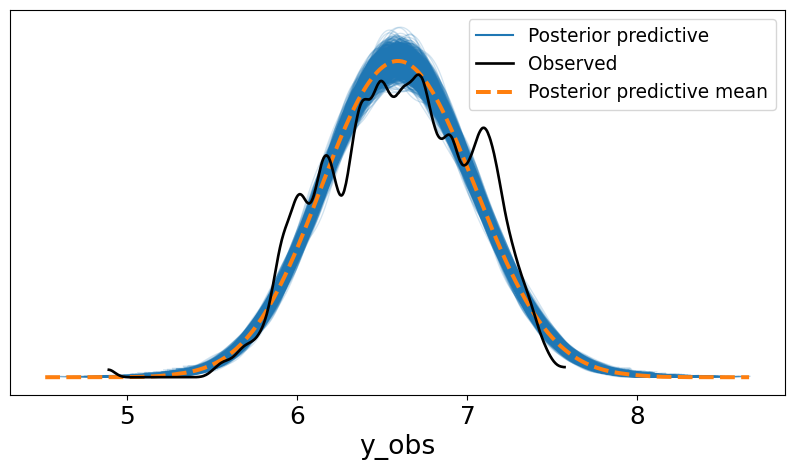

In [41]:
with model2:
    ppc = pm.sample_posterior_predictive(trace2, var_names=["y_obs"])

# Plot PPC results
az.plot_ppc(ppc, group="posterior", figsize=(10, 5))
plt.show()

In [42]:
with model:
    pm.compute_log_likelihood(trace)

with model2:
    pm.compute_log_likelihood(trace2)

Output()

Output()

In [43]:
waic = az.waic(trace, var_name='y_obs', scale='deviance')
print(waic)

waic2 = az.waic(trace2, var_name='y_obs', scale='deviance')
print(waic2)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 2000 posterior samples and 3936 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  1351.08    94.67
p_waic           66.93        -

There has been a warning during the calculation. Please check the results.
Computed from 2000 posterior samples and 3936 observations log-likelihood matrix.

              Estimate       SE
deviance_waic  1350.53    94.70
p_waic           66.60        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


In [44]:
res = az.compare({"fixed effects": trace,"random effects": trace2}, ic = "waic", var_name='y_obs', scale='deviance')
res

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
random effects,0,"1,350.53",66.60,0.00,1.00,94.70,0.00,True,deviance
fixed effects,1,"1,351.08",66.93,0.54,0.00,94.67,0.60,True,deviance


In [45]:
res.to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrrrrrrl}\n\\toprule\n & rank & elpd_waic & p_waic & elpd_diff & weight & se & dse & warning & scale \\\\\n\\midrule\nrandom effects & 0 & 1350.53 & 66.60 & 0.00 & 1.00 & 94.70 & 0.00 & True & deviance \\\\\nfixed effects & 1 & 1351.08 & 66.93 & 0.54 & 0.00 & 94.67 & 0.60 & True & deviance \\\\\n\\bottomrule\n\\end{tabular}\n'

Bayesian Heirarchichal Modeling Investigation
1. Run K-Means Clustering
2. ANOVA to test significant salary differences in clusters

In [46]:
NBA_salaries_team = NBA_stats_salaries_merged[['Team', 'Player', 'Year', 'log_salary', 'Age']]
NBA_salaries_team

,Team,Player,Year,log_salary,Age
98,DET,Jerry Stackhouse,2001,6.73,27.00
99,PHI,Allen Iverson,2001,7.01,26.00
100,LAL,Shaquille O'Neal,2001,7.29,29.00
101,BOS,Paul Pierce,2001,6.21,24.00
102,TOR,Vince Carter,2001,6.38,24.00
...,...,...,...,...,...
4035,LAC,Sindarius Thornwell,2019,6.14,25.00
4036,LAC,Luc Mbah a Moute,2019,6.64,33.00
4037,CHI,Tyler Ulis,2019,4.89,23.00
4038,CLE,John Holland,2019,4.89,31.00


In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [48]:
scaler = StandardScaler()
NBA_salaries_team['Scaled_Age'] = scaler.fit_transform(NBA_salaries_team[['Age']])

<ipython-input-48-b18c59fb055c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_salaries_team['Scaled_Age'] = scaler.fit_transform(NBA_salaries_team[['Age']])


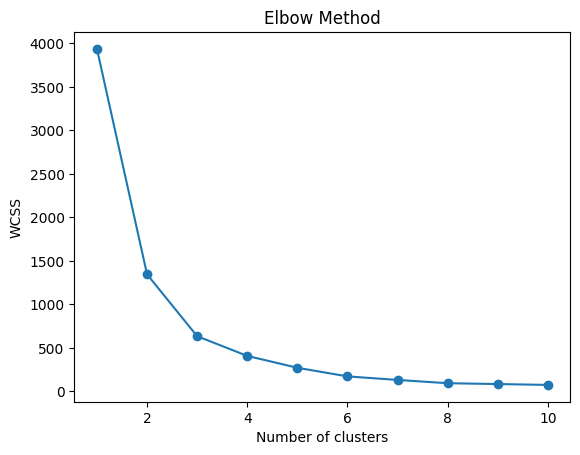

In [49]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(NBA_salaries_team[['Scaled_Age']])
  wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(NBA_salaries_team[['Scaled_Age']])
NBA_salaries_team['Cluster'] = kmeans.fit_predict(NBA_salaries_team[['Scaled_Age']])

<ipython-input-50-cfbe248c6b62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_salaries_team['Cluster'] = kmeans.fit_predict(NBA_salaries_team[['Scaled_Age']])


<ipython-input-51-06de7cb97599>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=NBA_salaries_team, x='Age', y='Cluster', palette='viridis')


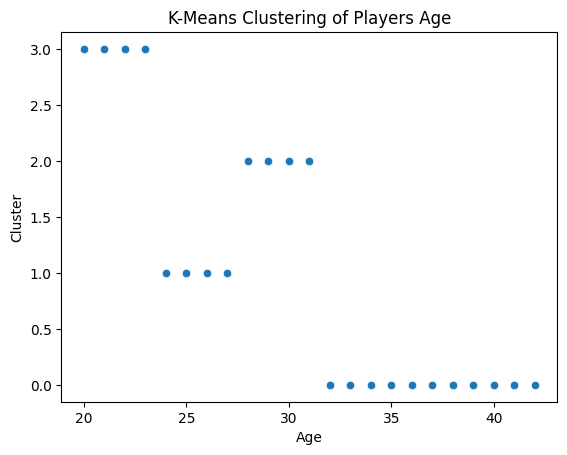

In [51]:
# Scatterplot of Salary vs. Cluster
sns.scatterplot(data=NBA_salaries_team, x='Age', y='Cluster', palette='viridis')
plt.title('K-Means Clustering of Players Age')
plt.show()

In [52]:
NBA_salaries_team

,Team,Player,Year,log_salary,Age,Scaled_Age,Cluster
98,DET,Jerry Stackhouse,2001,6.73,27.00,-0.17,1
99,PHI,Allen Iverson,2001,7.01,26.00,-0.41,1
100,LAL,Shaquille O'Neal,2001,7.29,29.00,0.31,2
101,BOS,Paul Pierce,2001,6.21,24.00,-0.89,1
102,TOR,Vince Carter,2001,6.38,24.00,-0.89,1
...,...,...,...,...,...,...,...
4035,LAC,Sindarius Thornwell,2019,6.14,25.00,-0.65,1
4036,LAC,Luc Mbah a Moute,2019,6.64,33.00,1.27,0
4037,CHI,Tyler Ulis,2019,4.89,23.00,-1.13,3
4038,CLE,John Holland,2019,4.89,31.00,0.79,2


In [53]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 10.5 MB/s eta 0:00:00


In [54]:
## Run ANOVA to see if clusters have significantly different salaries
##1. Extract salaries and clusters
salaries = NBA_salaries_team['log_salary']
clusters = NBA_salaries_team['Cluster']

##2. Run ANOVA
# Organize data by color
data_dict = {}
for key, val in zip(clusters, salaries):
    data_dict.setdefault(key, []).append(val)


# Using pm.Data to load observed data for each group
with pm.Model() as m:
    pm_data1 = pm.Data("data1", data_dict[1])
    pm_data2 = pm.Data("data2", data_dict[2])
    pm_data3 = pm.Data("data3", data_dict[3])

    # Define global mean and standard deviation
    mu0 = pm.Normal("mu0", mu=5, sigma=5)

    # Group effects with sum-to-zero constraint
    kappa2 = pm.Normal("kappa2", mu=0, sigma=5)
    kappa3 = pm.Normal("kappa3", mu=0, sigma=5)
    kappa1 = pm.Deterministic("kappa1", -(kappa2 + kappa3))  # Sum-to-zero constraint

    # Group means
    mu_1 = mu0 + kappa1
    mu_2 = mu0 + kappa2
    mu_3 = mu0 + kappa3

    sigma = pm.Exponential("sigma", 1)

    # Likelihoods using pm.Data
    pm.Normal("lik1", mu=mu_1, sigma=sigma, observed=pm_data1)
    pm.Normal("lik2", mu=mu_2, sigma=sigma, observed=pm_data2)
    pm.Normal("lik3", mu=mu_3, sigma=sigma, observed=pm_data3)

    # Pairwise comparisons for post hoc analysis
    onetwo = pm.Deterministic("kappa1-2", kappa1 - kappa2)
    onethree = pm.Deterministic("kappa1-kappa3", kappa1 - kappa3)
    twothree = pm.Deterministic("kappa2-kappa3", kappa2 - kappa3)

    # Sampling from the posterior
    trace = pm.sample(1000, nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [55]:
az.summary(trace, var_names=["kappa"], filter_vars="like", kind="stats", hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%
kappa1,-0.04,0.01,-0.06,-0.02
kappa1-2,-0.28,0.01,-0.31,-0.25
kappa1-kappa3,0.15,0.02,0.12,0.19
kappa2,0.24,0.01,0.22,0.25
kappa2-kappa3,0.43,0.02,0.40,0.47
kappa3,-0.20,0.01,-0.22,-0.17


In [56]:
az.summary(trace, var_names=["kappa"], filter_vars="like", kind="stats", hdi_prob=0.95).to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrr}\n\\toprule\n & mean & sd & hdi_2.5% & hdi_97.5% \\\\\n\\midrule\nkappa1 & -0.04 & 0.01 & -0.06 & -0.02 \\\\\nkappa1-2 & -0.28 & 0.01 & -0.31 & -0.25 \\\\\nkappa1-kappa3 & 0.15 & 0.02 & 0.12 & 0.19 \\\\\nkappa2 & 0.24 & 0.01 & 0.22 & 0.25 \\\\\nkappa2-kappa3 & 0.43 & 0.02 & 0.40 & 0.47 \\\\\nkappa3 & -0.20 & 0.01 & -0.22 & -0.17 \\\\\n\\bottomrule\n\\end{tabular}\n'

2. Run the Bayesian Heirarchichal Model

In [57]:
##Extract the variables and dataset
X = NBA_stats_salaries_merged[['GP_std', 'MIN_per_gp_std', 'FG_pct', 'THREES_pct', 'FT_pct', 'PF_per_min', 'TOV_per_min', 'REB_per_min', 'AST_per_min', 'STL_per_min', 'BLK_per_min', 'PTS_per_min']]
y = NBA_stats_salaries_merged['log_salary']

cluster_idx, cluster = pd.factorize(NBA_salaries_team['Cluster'])
coords = {"cluster": clusters, "id": NBA_salaries_team.index}

X = X.values
y = y.values

## find number years and teams categorize variable Years and Teams for random effects
no_years = NBA_stats_salaries_merged['Year'].nunique()
NBA_stats_salaries_merged['Year_code'] = NBA_stats_salaries_merged['Year'].astype('category').cat.codes

no_teams = NBA_stats_salaries_merged['Team'].nunique()
NBA_stats_salaries_merged['Team_code'] = NBA_stats_salaries_merged['Team'].astype('category').cat.codes

In [58]:
X.shape[1]

12

In [59]:
# Bayesian GLM with random effects with weakly informative priors
with pm.Model() as model3:
    y_data = pm.Data("y", y, mutable=False)
    cluster_idx_data = pm.Data("cluster_idx_data", cluster_idx, dims = "id", mutable=False)

    # Priors for global intercept and coefficients
    intercept = pm.Normal("Intercept", mu=5, sigma=5)

    beta = pm.Normal("beta", mu=0, sigma=3)
    sigma = pm.Exponential("sigma", 1)

    # Priors for beta_clusters
    beta_clusters = pm.Normal("beta_clusters", mu=beta, sigma=sigma, shape=(4, X.shape[1]))

    # Priors for random effects
    team_effects = pm.Normal("team_effects", mu=0, sigma=2, shape=no_teams)
    year_effects = pm.Normal("year_effects", mu=0, sigma=2, shape=no_years)

    # Expected value of the target
    mu = (
        intercept
        + pm.math.sum(X * beta_clusters[cluster_idx_data], axis=1)
        + team_effects[NBA_stats_salaries_merged['Team_code']]  # Team random effects
        + year_effects[NBA_stats_salaries_merged['Year_code']]  # Year random effects
    )

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_data, dims="id")

    # Sampling
    trace3 = pm.sample(1000, tune = 1000, return_inferencedata=True)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:440: FutureWarning: Data is now always mutable. Specifying the `mutable` kwarg will raise an error in a future release
  warnings.warn(


Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [60]:
az.summary(trace3, var_names=["Intercept", "beta_clusters"], hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.16,0.59,5.07,7.29,0.04,0.03,181.00,352.00,1.01
"beta_clusters[0, 0]",-0.01,0.01,-0.03,0.01,0.00,0.00,"3,653.00","1,900.00",1.00
"beta_clusters[0, 1]",0.19,0.01,0.17,0.21,0.00,0.00,"2,839.00","1,570.00",1.00
"beta_clusters[0, 2]",-0.18,0.13,-0.44,0.07,0.00,0.00,"2,491.00","1,363.00",1.00
"beta_clusters[0, 3]",-0.06,0.06,-0.17,0.07,0.00,0.00,"2,234.00","1,338.00",1.00
"beta_clusters[0, 4]",-0.23,0.08,-0.40,-0.08,0.00,0.00,"2,306.00","1,355.00",1.00
"beta_clusters[0, 5]",-0.12,0.23,-0.54,0.32,0.00,0.01,"3,341.00","1,727.00",1.00
"beta_clusters[0, 6]",0.04,0.25,-0.46,0.50,0.00,0.01,"3,331.00","1,602.00",1.00
"beta_clusters[0, 7]",0.87,0.13,0.64,1.11,0.00,0.00,"2,711.00","1,566.00",1.00
"beta_clusters[0, 8]",0.41,0.14,0.11,0.67,0.00,0.00,"2,888.00","1,516.00",1.00


In [61]:
az.summary(trace3, var_names=["Intercept", "beta_clusters"], hdi_prob=0.95).to_latex(index=True, float_format="%.2f")

'\\begin{tabular}{lrrrrrrrrr}\n\\toprule\n & mean & sd & hdi_2.5% & hdi_97.5% & mcse_mean & mcse_sd & ess_bulk & ess_tail & r_hat \\\\\n\\midrule\nIntercept & 6.16 & 0.59 & 5.07 & 7.29 & 0.04 & 0.03 & 181.00 & 352.00 & 1.01 \\\\\nbeta_clusters[0, 0] & -0.01 & 0.01 & -0.03 & 0.01 & 0.00 & 0.00 & 3653.00 & 1900.00 & 1.00 \\\\\nbeta_clusters[0, 1] & 0.19 & 0.01 & 0.17 & 0.21 & 0.00 & 0.00 & 2839.00 & 1570.00 & 1.00 \\\\\nbeta_clusters[0, 2] & -0.18 & 0.13 & -0.44 & 0.07 & 0.00 & 0.00 & 2491.00 & 1363.00 & 1.00 \\\\\nbeta_clusters[0, 3] & -0.06 & 0.06 & -0.17 & 0.07 & 0.00 & 0.00 & 2234.00 & 1338.00 & 1.00 \\\\\nbeta_clusters[0, 4] & -0.23 & 0.08 & -0.40 & -0.08 & 0.00 & 0.00 & 2306.00 & 1355.00 & 1.00 \\\\\nbeta_clusters[0, 5] & -0.12 & 0.23 & -0.54 & 0.32 & 0.00 & 0.01 & 3341.00 & 1727.00 & 1.00 \\\\\nbeta_clusters[0, 6] & 0.04 & 0.25 & -0.46 & 0.50 & 0.00 & 0.01 & 3331.00 & 1602.00 & 1.00 \\\\\nbeta_clusters[0, 7] & 0.87 & 0.13 & 0.64 & 1.11 & 0.00 & 0.00 & 2711.00 & 1566.00 & 1.00 \\\\

Output()

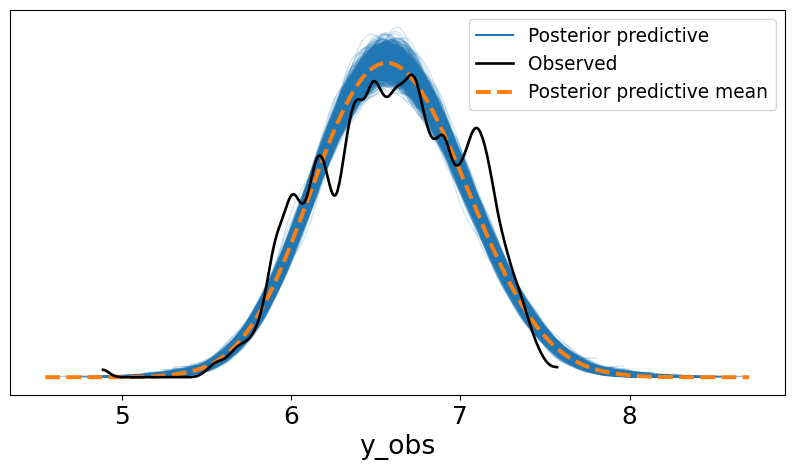

In [62]:
with model3:
    ppc = pm.sample_posterior_predictive(trace3, var_names=["y_obs"])

# Plot PPC results
az.plot_ppc(ppc, group="posterior", figsize=(10, 5))
plt.show()

In [66]:
with model3:
    pm.compute_log_likelihood(trace3)

Output()

In [67]:
waic3 = az.waic(trace3, var_name='y_obs', scale='deviance')
waic3

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:1653: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,0
elpd_waic,"1,169.55"
se,95.79
p_waic,82.42
n_samples,2000
n_data_points,3936
warning,True
waic_i,[<xarray.DataArray 'waic_i' ()> Size: 8B\narra...
scale,deviance


In [68]:
waic3.to_latex(index=True, float_format="%.2f")

"\\begin{tabular}{ll}\n\\toprule\n & 0 \\\\\n\\midrule\nelpd_waic & 1169.55 \\\\\nse & 95.79 \\\\\np_waic & 82.42 \\\\\nn_samples & 2000 \\\\\nn_data_points & 3936 \\\\\nwarning & True \\\\\nwaic_i & <xarray.DataArray 'waic_i' (id: 3936)> Size: 31kB\narray([-0.31435134, -0.48924941, -0.57613553, ..., 14.34841451,\n       10.79376276, 14.27245266])\nCoordinates:\n  * id       (id) int64 31kB 0 1 2 3 4 5 6 ... 3930 3931 3932 3933 3934 3935 \\\\\nscale & deviance \\\\\n\\bottomrule\n\\end{tabular}\n"